## Investment Management with Python and Machine Learning
### Course 1 - Introduction to Portfolio Costruction and Analysis with Python
#### Module 1 - Graded Quiz

In [305]:
import pandas as pd
import numpy as np

In [306]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                    header=0, index_col=0, parse_dates=True, na_values=-99.99)

cols = ['Lo 20', 'Hi 20']
returns = returns[cols]
returns.columns = ['SmallCap', 'LargeCap']

returns = returns / 100

returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index = returns.index.to_period('M')

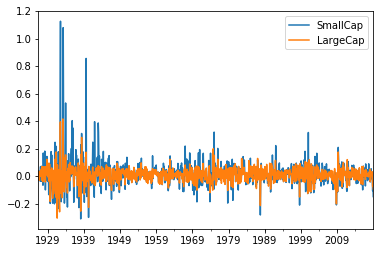

In [307]:
returns.plot()

1. What was the Annualized Return of the Lo 20 portfolio over the entire period?

In [308]:
n_months = returns.shape[0]
annualized_return = (returns['SmallCap']+1).prod()**(12/n_months) - 1

print('The annualised return for the Small Cap Portfolio over the period is {}%'.format((annualized_return*100).round(2)))

The annualised return for the Small Cap Portfolio over the period is 15.2%


In [309]:
q1_ans = (annualized_return*100).round(2)

2. What was the Annualized Volatility of the Lo 20 portfolio over the entire period? 

In [310]:
annualized_vol = returns['SmallCap'].std()*np.sqrt(12)

print('The annualised volatility of the Small Cap Portfolio over the period is {}%'.format((annualized_vol*100).round(2)))

The annualised volatility of the Small Cap Portfolio over the period is 33.67%


In [311]:
q2_ans = (annualized_vol*100).round(2)

3. What was the Annualized Return of the Hi 20 portfolio over the entire period? 

In [312]:
annualized_return = (returns['LargeCap']+1).prod()**(12/n_months) - 1

print('The annualised return for the Large Cap Portfolio over the period is {}%'.format((annualized_return*100).round(2)))

The annualised return for the Large Cap Portfolio over the period is 9.85%


In [313]:
q3_ans = (annualized_return*100).round(2)

4. What was the Annualized Volatility of the Hi 20 portfolio over the entire period ?

In [314]:
annualized_vol = returns['LargeCap'].std()*np.sqrt(12)

print('The annualised volatility of the Large Cap Portfolio over the period is {}%'.format((annualized_vol*100).round(2)))

The annualised volatility of the Large Cap Portfolio over the period is 19.51%


In [315]:
q4_ans = (annualized_vol*100).round(2)

5. What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

In [316]:
n_months = returns['SmallCap']['1999':'2015'].shape[0]

In [317]:
annualized_return = (returns['SmallCap']['1999':'2015']+1).prod()**(12/n_months) - 1

print('The annualised return for the Small Cap Portfolio over the period 1999-2015 is {}%'.format((annualized_return*100).round(2)))

The annualised return for the Small Cap Portfolio over the period 1999-2015 is 11.44%


In [318]:
q5_ans = (annualized_return*100).round(2)

6. What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

In [319]:
annualized_vol = returns['SmallCap']['1999':'2015'].std()*np.sqrt(12)

print('The annualised volatility of the Small Cap Portfolio over the period 1999-2005 is {}%'.format((annualized_vol*100).round(2)))

The annualised volatility of the Small Cap Portfolio over the period 1999-2005 is 22.89%


In [320]:
q6_ans = (annualized_vol*100).round(2)

7. What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?

In [321]:
annualized_return = (returns['LargeCap']['1999':'2015']+1).prod()**(12/n_months) - 1

print('The annualised return for the Large Cap Portfolio over the period 1999-2015 is {}%'.format((annualized_return*100).round(2)))

The annualised return for the Large Cap Portfolio over the period 1999-2015 is 6.29%


In [322]:
q7_ans = (annualized_return*100).round(2)

8. What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [323]:
annualized_vol = returns['LargeCap']['1999':'2015'].std()*np.sqrt(12)

print('The annualised volatility of the Large Cap Portfolio over the period 1999-2005 is {}%'.format((annualized_vol*100).round(2)))

The annualised volatility of the Large Cap Portfolio over the period 1999-2005 is 17.27%


In [324]:
q8_ans = (annualized_vol*100).round(2)

9. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

In [325]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [326]:
dd = drawdown(returns['SmallCap']['1999':'2015'])
max_drawdown = dd['Drawdown'].min()*-1

print('The max drawdown for the Small Cap Portfolio over the period 1999 to 2015 is {}%'.format((max_drawdown*100).round(2)))

The max drawdown for the Small Cap Portfolio over the period 1999 to 2015 is 62.48%


In [327]:
q9_ans = (max_drawdown*100).round(2)

10. At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur? 

In [328]:
max_drawdown_month = dd["Drawdown"].idxmin()

print('The max drawdown occurred in the month {}'.format(max_drawdown_month))

The max drawdown occurred in the month 2009-02


In [329]:
q10_ans = max_drawdown_month

11. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

In [330]:
dd = drawdown(returns['LargeCap']['1999':'2015'])
max_drawdown = dd['Drawdown'].min()*-1

print('The max drawdown for the Large Cap Portfolio over the period 1999 to 2015 is {}%'.format((max_drawdown*100).round(2)))

The max drawdown for the Large Cap Portfolio over the period 1999 to 2015 is 55.27%


In [331]:
q11_ans = (max_drawdown*100).round(2)

12. Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

In [332]:
max_drawdown_month = dd["Drawdown"].idxmin()

print('The max drawdown occurred in the month {}'.format(max_drawdown_month))

The max drawdown occurred in the month 2009-02


In [333]:
q12_ans = max_drawdown_month

For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. 

In [334]:
hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

13. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?

In [335]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [336]:
sd_hfi = semideviation(hfi['2009':'2018'])

In [337]:
q13_ans = sd_hfi.idxmax()

14. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation? 

In [338]:
q14_ans = sd_hfi.idxmin()

15. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed? 

In [339]:
import scipy.stats
scipy.stats.skew(hfi['2009':'2018'])

array([ 1.30591093,  0.05206195, -0.25494434,  0.03312287, -0.89632731,
       -0.48882095,  1.12145348,  0.34818394, -0.46370341, -0.55106451,
        0.15995286,  0.45651822, -0.64690778])

In [340]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [341]:
q15_ans = skewness(hfi['2009':'2018']).idxmin()

16. Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?

In [342]:
pd.DataFrame({'strategy':hfi.columns, 'kurtosis':scipy.stats.kurtosis(hfi)})

,strategy,kurtosis
0,Convertible Arbitrage,20.280834
1,CTA Global,-0.047040
2,Distressed Securities,4.889983
3,Emerging Markets,6.250788
4,Equity Market Neutral,14.218555
5,Event Driven,5.035828
6,Fixed Income Arbitrage,26.842199
7,Global Macro,2.741679
8,Long/Short Equity,1.523893
9,Merger Arbitrage,5.738950


In [343]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [344]:
q16_ans = kurtosis(hfi['2009':'2018']).idxmax()

In [345]:
kurtosis(hfi['2009':'2018']).sort_values

<bound method Series.sort_values of Convertible Arbitrage     6.775731
CTA Global                2.591087
Distressed Securities     3.319725
Emerging Markets          4.401636
Equity Market Neutral     5.071677
Event Driven              3.620617
Fixed Income Arbitrage    6.406941
Global Macro              3.164362
Long/Short Equity         4.115713
Merger Arbitrage          2.715238
Relative Value            4.512482
Short Selling             4.175832
Funds Of Funds            3.816132
dtype: float64>

In [346]:
pd.DataFrame({'questions':[x for x in range(1,17)], 'answers':[q1_ans, q2_ans, q3_ans, q4_ans, q5_ans, q6_ans, q7_ans, q8_ans,
                                             q9_ans, q10_ans, q11_ans, q12_ans, q13_ans, q14_ans, q15_ans, q16_ans]})

,questions,answers
0,1,15.2
1,2,33.67
2,3,9.85
3,4,19.51
4,5,11.44
5,6,22.89
6,7,6.29
7,8,17.27
8,9,62.48
9,10,2009-02


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]